In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
largeRT = pd.read_csv('large_rt_sheet.csv')

In [35]:
oscars = pd.read_csv('oscar_noms_and_winners.csv')
oscarYears = oscars[oscars['year_ceremony']>1999]
actor = oscarYears[oscarYears['category']=='ACTOR IN A LEADING ROLE']
actress = oscarYears[oscarYears['category']=='ACTRESS IN A LEADING ROLE']
director = oscarYears[oscarYears['category']=='DIRECTING']
picture = oscarYears[oscarYears['category']=='BEST PICTURE']

In [36]:
oscarYears = oscarYears.rename(columns={'film':'Movie_Name'})

In [37]:
lrtActor = pd.merge(largeRT, actor, how='inner', left_on='movie_title', right_on='film')
lrtActress = pd.merge(largeRT, actress, how='inner', left_on='movie_title', right_on='film')
lrtDirector = pd.merge(largeRT, director, how='inner', left_on='movie_title', right_on='film')
lrtPicture = pd.merge(largeRT, picture, how='inner', left_on='movie_title', right_on='film')

In [38]:
print(lrtActor.columns)
print('-----------')

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'year_film', 'year_ceremony', 'ceremony', 'category', 'name', 'film',
       'winner'],
      dtype='object')
-----------


In [39]:
removeMe = ['rotten_tomatoes_link', 'movie_info', 'critics_consensus', 'content_rating', 'directors', 'authors', 'actors', 'original_release_date', 'streaming_release_date', 'runtime', 'production_company', 'year_film', 'ceremony', 'film']
lrtActor2 = lrtActor.drop(columns=removeMe)
lrtActress2 = lrtActress.drop(columns=removeMe)
lrtDirector2 = lrtDirector.drop(columns=removeMe)
lrtPicture2 = lrtPicture.drop(columns=removeMe)
print(lrtActor2.columns)
print('----------')

Index(['movie_title', 'genres', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'year_ceremony', 'category', 'name', 'winner'],
      dtype='object')
----------


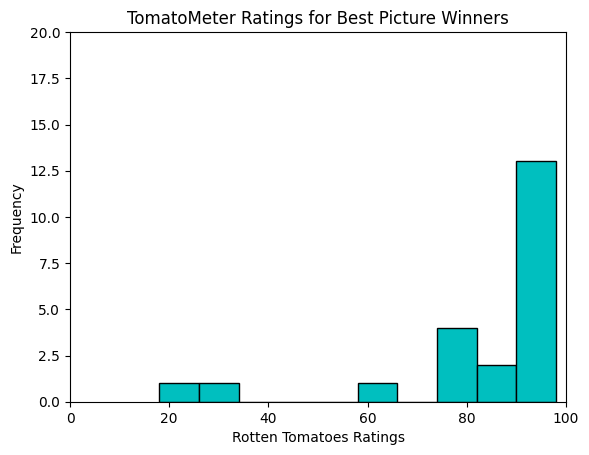

82.13636363636364


In [40]:
lrtPicWin = lrtPicture2[lrtPicture2['winner']==True]
tomatoes = lrtPicWin['tomatometer_rating']
plt.hist(tomatoes, bins=10, edgecolor='black', color='c')
plt.ylim(0,20)
plt.xlim(0, 100)
plt.xlabel('Rotten Tomatoes Ratings')
plt.ylabel('Frequency')
plt.title('TomatoMeter Ratings for Best Picture Winners')
plt.show()
print(tomatoes.mean())

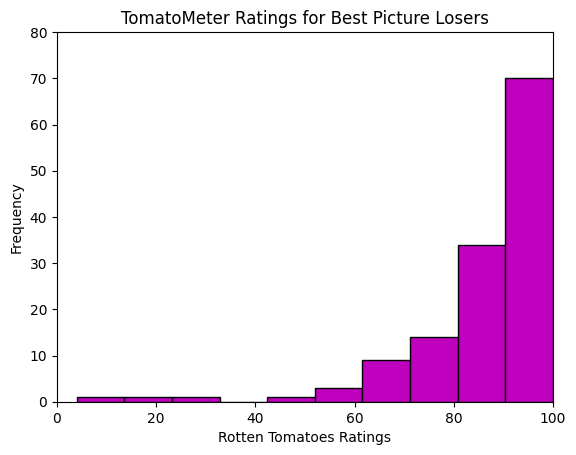

85.94029850746269


In [41]:
lrtPicLose = lrtPicture2[lrtPicture2['winner']==False]
tomatoes = lrtPicLose['tomatometer_rating']
plt.hist(tomatoes, bins=10, edgecolor='black', color='m')
plt.ylim(0,80)
plt.xlim(0, 100)
plt.xlabel('Rotten Tomatoes Ratings')
plt.ylabel('Frequency')
plt.title('TomatoMeter Ratings for Best Picture Losers')
plt.show()
print(tomatoes.mean())

82.13636363636364
4.503147266197562
85.94029850746269
1.2660710214864064


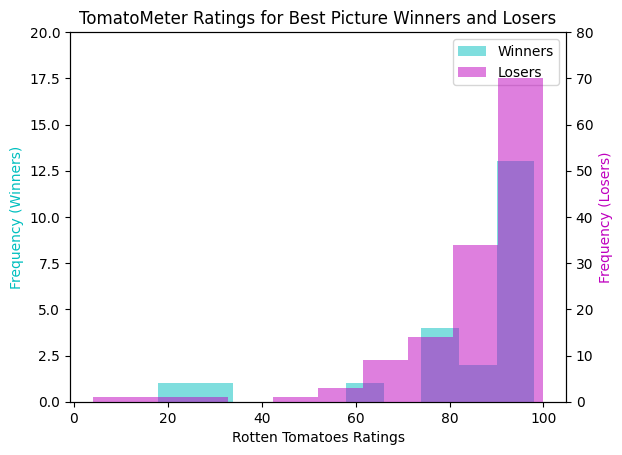

In [42]:
lrtPicWin2 = lrtPicture2[lrtPicture2['winner']==True]
lrtPicLose2 = lrtPicture2[lrtPicture2['winner']==False]

tomatoWinners = lrtPicWin2['tomatometer_rating']
tomatoLosers = lrtPicLose2['tomatometer_rating']
print(tomatoWinners.mean())
print(tomatoWinners.sem())
print(tomatoLosers.mean())
print(tomatoLosers.sem())

fig, ax = plt.subplots()
ax.hist(tomatoWinners, bins=10, alpha=0.5, label='Winners', color='c')

ax.set_xlabel('Rotten Tomatoes Ratings')
ax.set_ylabel('Frequency (Winners)', color='c')
ax.set_title('TomatoMeter Ratings for Best Picture Winners and Losers')
ax.set_ylim(0, 20) 

ax2 = ax.twinx()
ax2.hist(tomatoLosers, bins=10, alpha=0.5, label='Losers', color='m')
ax2.set_ylabel('Frequency (Losers)', color='m')
ax2.set_ylim(0, 80)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

In [43]:
from scipy import stats

lrtPicWin2 = lrtPicture[lrtPicture['winner'] == True]['tomatometer_rating']
lrtPicLose2 = lrtPicture[lrtPicture['winner'] == False]['tomatometer_rating']

t, p = stats.ttest_ind(lrtPicWin2, lrtPicLose2)
alpha = 0.05
print(p)
if p < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

0.2937244472196729
Fail to reject null hypothesis
